# Calculating Height Using the Linear Accelerometer

The purpose of this juptyer notebook is to take a csv accelerometer readings and return the height of a person or object. This notebook is taylored to work with the ouput from the Phyphox app for the iPhone, specifically the "Acceleration (without g)" raw sensor, (also available for android), but we have tried to make it easily modified for other apps. To generate the necessary data to calculate height we began recording when the phone was at rest on the ground and then lifted the phone until it reached the height of the person we measured. We paused briefly before stopping the recording. Using the acceration data we approximated the person's height using a Riemann sum.

### The Input File Specification

What follows assumes that the input.csv file resembles:
```
Time (s), Linear Acceleration x (m/s^2), Linear Acceleration y (m/s^2), Linear Acceleration z (m/s^2), Absolute acceleration (m/s^2)

0.000000,	-0.081457,	-0.065700,	-0.114250,	0.154935,
0.009988,	-0.081636,	-0.057592,	-0.085180,	0.131289,
0.019976,	-0.151881,	-0.028972,	-0.128110,	0.200797,
0.029963,	-0.145120,	-0.014326,	-0.186789,	0.236971,
0.039951,	-0.052697,	-0.040153,	-0.211472,	0.221607

```
The ```Time (s)``` column has a time stamp for each data point given in seconds by time elapsed since the recording started.

The accelerometer calculates acceleration in the $x$, $y$, and $z$ directions. The ```Linear Acceleration x (m/s^2), Linear Acceleration y (m/s^2)``` and ```Linear Acceleration z (m/s^2)``` columns represent these directional accelerations respectively. For the iPhone and this particular app, the $x$-axis is parrallel to the width of the phone, the $y$-axis is parallel to the height of the phone, and the $z$-axis is perpendicular to the face of the phone, where a vector coming out of the face of the phone points in the positive direction. Your axes may be oreinted differently. You may also need to edit the headers depending on the format of your data file.

The ```Absolute acceleration (m/s^2)``` column values is the magnitude of the vector ```<Linear Acceleration x (m/s^2), Linear Acceleration y (m/s^2), Linear Acceleration z (m/s^2)>```. It is always positive and not relevant for this experiment.

In [34]:
# These are the necessary libraries to plot, deal with arrays, and convert time from day to seconds
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

### Data Collection
We measured the acceleration readings as someone raised a phone from the floor to the height of the human of interest. The data were measured using Physics Toolbox Sensor Suite on an iPhone 8. The human of interest is 1.62 meters tall, and the notebook calculates their height to be 1.60 meters. Granted, there is potential for large error in data collection as it is difficult to precisely stop the phone at a person's exact height.

We recomend that students perform the data collection and following analysis at least three times to calculate three different height values, which can then be averaged. This will help to eliminate, or at least average out, some of the human error.

In [35]:
# Displaying the data
raw = pd.read_excel("PSM Calculating Height Accelerometer Reading.xls")
raw.head()

,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2),Absolute acceleration (m/s^2)
0,0.000000,0.109656,0.144639,-0.039712,0.185801
1,0.009987,0.118056,0.138814,-0.039563,0.186472
2,0.019975,0.120043,0.134523,-0.049895,0.187073
3,0.029962,0.125926,0.137986,-0.041064,0.191269
4,0.039950,0.120185,0.138033,-0.045854,0.188680


In [36]:
# Note we remaned the headers
az = raw['Linear Acceleration z (m/s^2)']
t = np.array(raw['Time (s)'])

In [37]:
# Here we calculate the average time between data points (dt)
total_time = t[-1]
dt = total_time/len(t)
dt

0.00998035516743067

In [38]:
# Converting the acceleration values into an array
az = np.array(az)
az

array([-0.03971195, -0.03956343, -0.04989488, ...,  0.60244565,
        0.61107321,  0.3387754 ])

### Data Correction
We began with the phone at rest for a period of time. We want to correct the data to make sure that when the phone was at rest is associated with $0 \frac{m}{s^2}$ acceleration. This is not a science. We proceeded by examining a graph of raw acceleration versus time to find when the phone was truly at rest. There is generally noise in the very beginning of the recording as the screen is pressed. Then we will average these data points and create a new array with correction by subtracting the average values from the array of raw acceleration values. This eliminates any error that might be present in the accelerometer

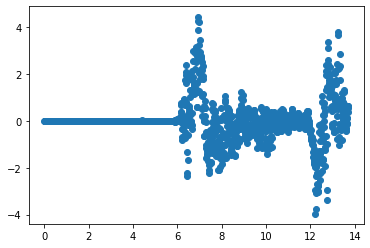

In [45]:
avg = np.average(az[50:100])
az = az-avg
plt.scatter(t,az)

### The Calculus of Position, Velocity, and Acceleration
Suppose the function $a(t)$ denotes the acceleration of an object (in our case, our phone) at a given time, $t$. Then the velocity function $v(t)$ is given by
$$v(t) = \int_{0}^{t} a(s)ds.$$ Integrating once more, we obtain,
$$x(t) = \int_{0}^{t} v(s) ds = \int_{0}^{t} \int_{0}^{t} a(s) ds ds $$ for the position function $x(t)$. 

Within this worksheet we will use the python function cumsum() to approximate these integrals. The function calculates a cumulative sum of the acceleration values. Then we multiply by our $\Delta t$, which as discussed earlier is an average of the times between readings. This calculates a Riemann sum to approximate our integral.

The height is 1.91 meters.


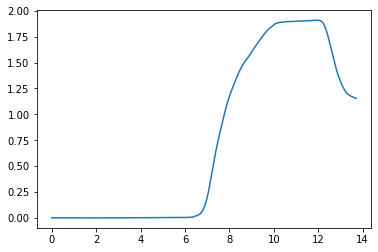

In [46]:
# Approximating the necessary integrals
vz = az.cumsum()*dt
#plt.plot(t,vz)
pz = vz.cumsum()*dt
plt.plot(t,pz)

# Calculating height by finding where the function obtains it's maximum (when the phone was at the height of the person)
height = np.amax(pz)
print("The height is", round(height,2), 'meters.')